In [2]:
#Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pdata = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
print(pdata.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


In [5]:
pdata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
pdata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
pdata.shape # Check number of columns and rows in data frame

(5000, 14)

2. Study the data distribution in each attribute, share your findings

In [8]:
pdata.isnull().values.any() # If there are any null values in data set

False

In [9]:
pdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


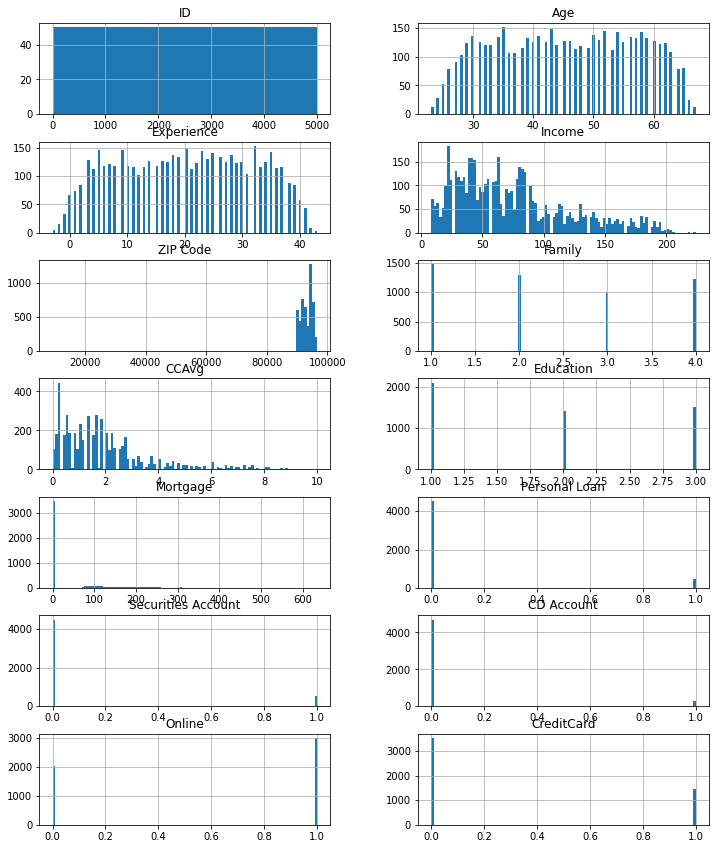

In [10]:
columns = list(pdata)[:] 
pdata[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of all columns

In [11]:
pdata.corr() # It will show correlation matrix

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [12]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=18):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

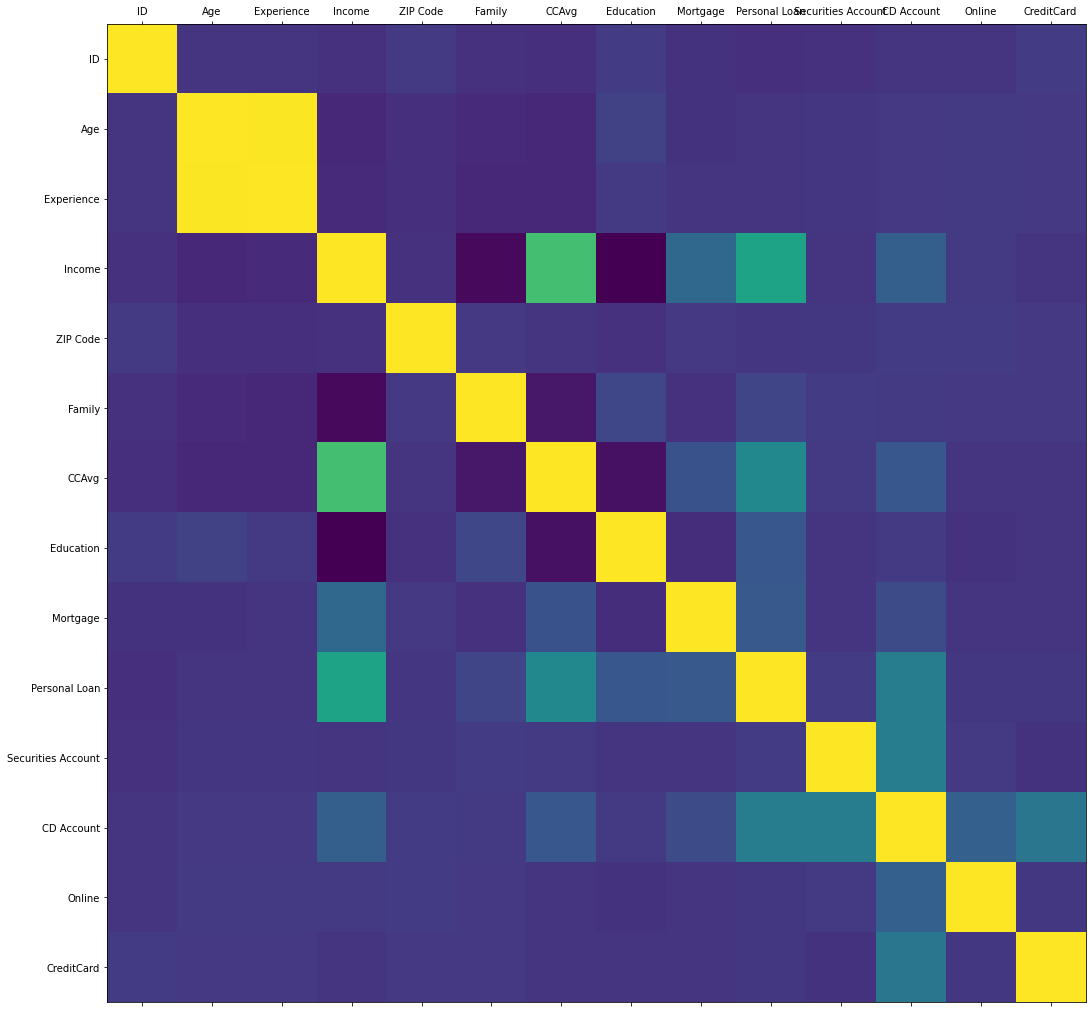

In [13]:

plot_corr(pdata)

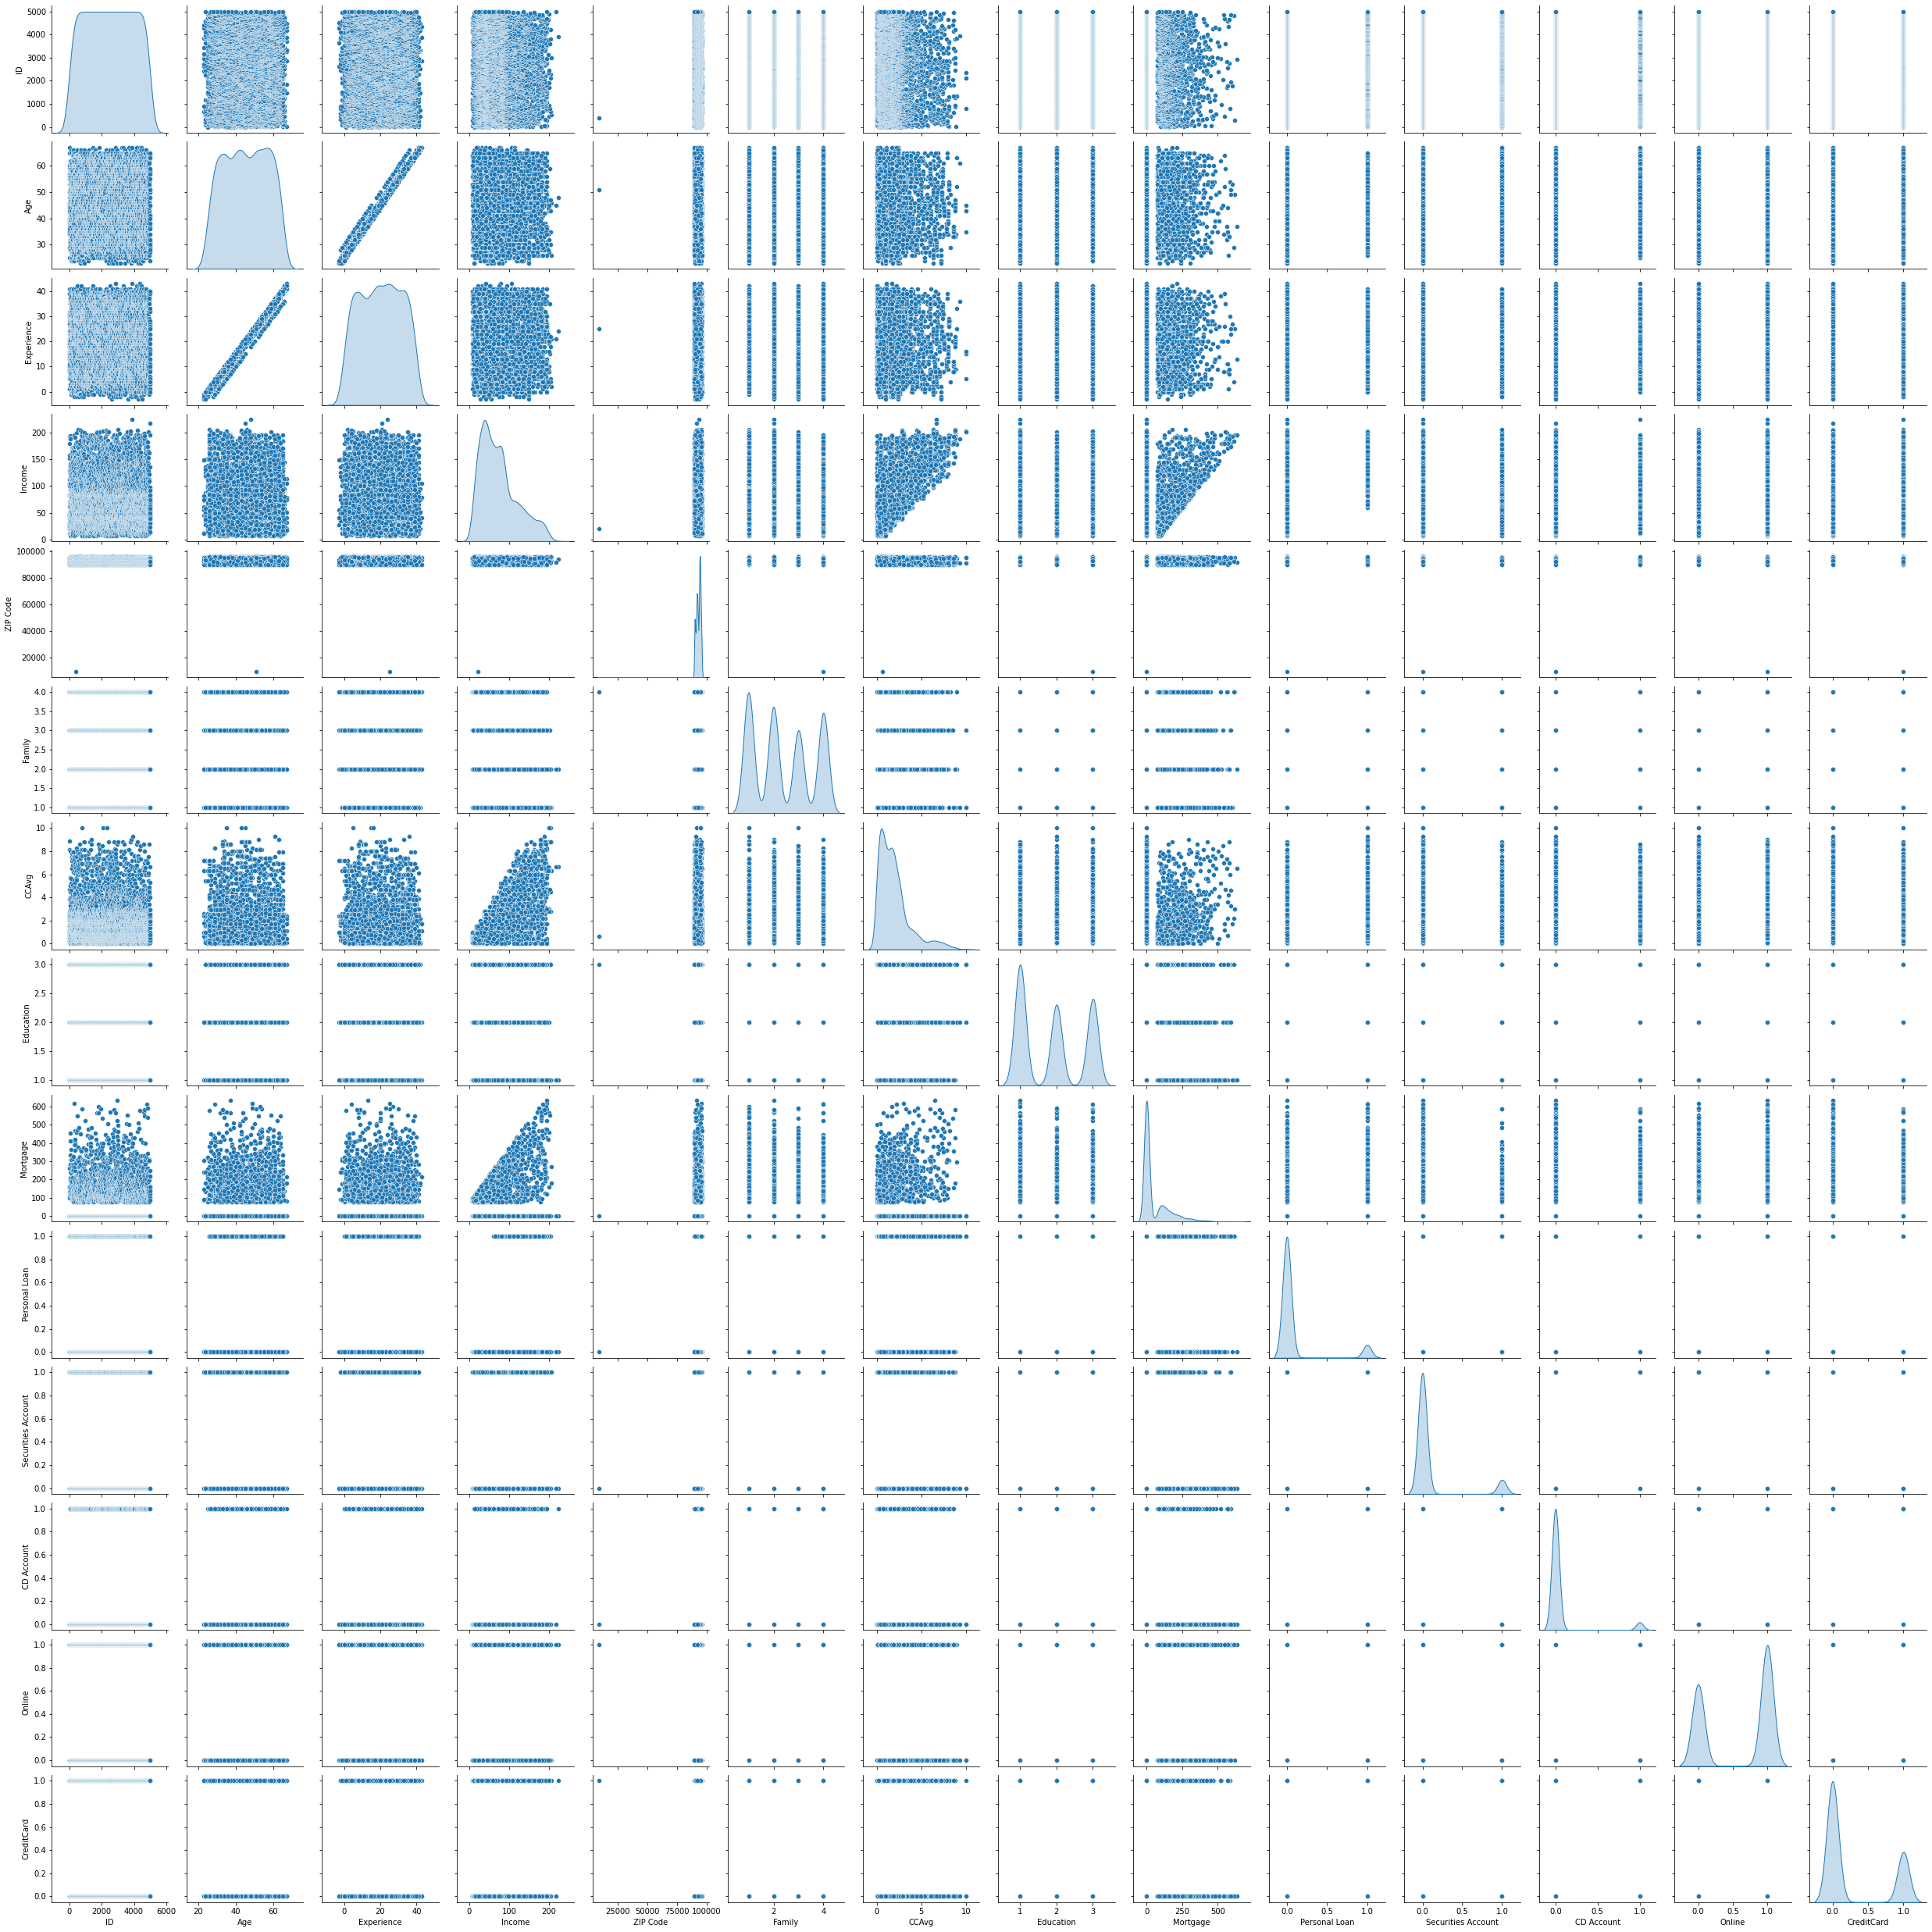

In [14]:
sns.pairplot(pdata,diag_kind='kde')

**3. Get the target column distribution.**

Calculate likelihood of buying personal loans ratio of True/False from outcome variable. Personal Loan is our Target column

In [15]:
n_true = len(pdata.loc[pdata['Personal Loan'] == True])
n_false = len(pdata.loc[pdata['Personal Loan'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


So we have 9.6 % people in current data set who likely to buy Personal Loan and rest of 90.40% doesn't likely to buy Personal Loan. Its a good distribution True/False cases of buying personal Loan in data.

**4. Split the data into training and test set in the ratio of 70:30 respectively**


In [16]:
from sklearn.model_selection import train_test_split

X = pdata.drop('Personal Loan',axis=1)     
Y = pdata['Personal Loan']  

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


In [17]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [18]:
print("Original Buying Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 1]), (len(pdata.loc[pdata['Personal Loan'] == 1])/len(pdata.index)) * 100))
print("Original Buying Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['Personal Loan'] == 0]), (len(pdata.loc[pdata['Personal Loan'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Buying Personal Loans True Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Buying Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Buying Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Buying Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Buying Personal Loan True Values    : 480 (9.60%)
Original Buying Personal Loan False Values   : 4520 (90.40%)

Training Buying Personal Loans True Values   : 331 (9.46%)
Training Buying Personal Loan False Values   : 3169 (90.54%)

Test Buying Personal Loan True Values        : 149 (9.93%)
Test Buying Personal Loan False Values       : 1351 (90.07%)



In [19]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13,21,95518,3,0.2,2,0,0,0,1,0


Replace 0s with serial mean

In [20]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1335.0,47.0,22.0,35.0,94304.0,2.0,1.3,1.0,181.659259,1.0,1.0,1.0,1.0
1,4769.0,38.0,14.0,39.0,93118.0,1.0,2.0,2.0,181.659259,1.0,1.0,1.0,1.0
2,66.0,59.0,35.0,131.0,91360.0,1.0,3.8,1.0,181.659259,1.0,1.0,1.0,1.0
3,178.0,29.0,3.0,65.0,94132.0,4.0,1.8,2.0,244.000000,1.0,1.0,1.0,1.0
4,4490.0,39.0,13.0,21.0,95518.0,3.0,0.2,2.0,181.659259,1.0,1.0,1.0,1.0


**5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans &**


**6. Print the confusion matrix for all the above models**
**Logistic Regression.** 

In [21]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2  ...        11        12  intercept
0 -0.000038 -0.000532 -0.000359  ... -0.000007 -0.000007  -0.000007

[1 rows x 14 columns]


In [22]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9093333333333333


Print the confusion matrix for Logistic Regression

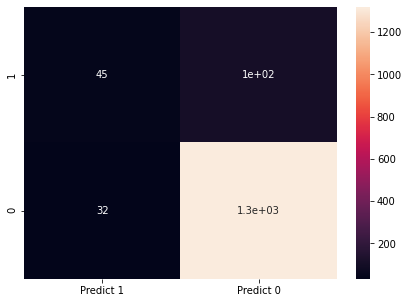

In [23]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they buy personal loan 45

True Negatives (TN): we correctly predicted that they don't buy personal loan 133

False Positives (FP): we incorrectly predicted that they buy personal loan (a "Type I error") 32 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't buy personal loan (a "Type II error") 102 Falsely predict negative Type II error

In [24]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.58      0.30      0.40       149
           0       0.93      0.98      0.95      1351

    accuracy                           0.91      1500
   macro avg       0.76      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500



**Naive Bayes algorithm**

In [25]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
loan_model = GaussianNB()

loan_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

**Performance of our model with training data**

In [26]:
loan_train_predict = loan_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, loan_train_predict)))
print()

Model Accuracy: 0.9051



Performance of our model with testing data

In [27]:
loan_test_predict = loan_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, loan_test_predict)))
print()

Model Accuracy: 0.8867



Confusion Matrix


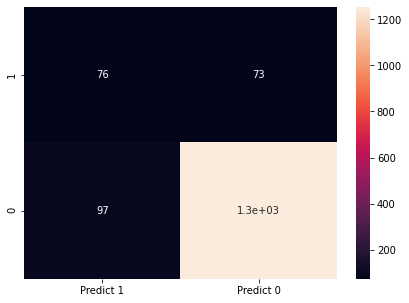

In [28]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, loan_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix True Positives (TP): we correctly predicted that they buy personal loan 76

True Negatives (TN): we correctly predicted that they don't buy personal loan 133

False Positives (FP): we incorrectly predicted that they buy personal loan (a "Type I error") 97 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't buy personal loan (a "Type II error") 73 Falsely predict negative Type II error

In [29]:
print("Classification Report")
print(metrics.classification_report(y_test, loan_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.44      0.51      0.47       149
           0       0.94      0.93      0.94      1351

    accuracy                           0.89      1500
   macro avg       0.69      0.72      0.70      1500
weighted avg       0.89      0.89      0.89      1500



K-NN Model

In [30]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [31]:

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

Evaluate Performance of K-NN Model

In [32]:
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.902

Print the confusion matrix for K-NN Model

Confusion Matrix


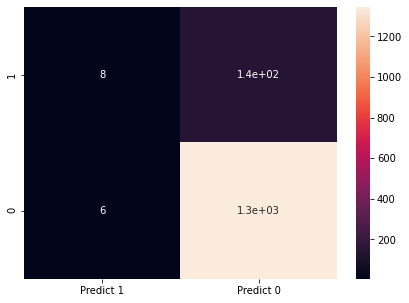

In [33]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

The confusion matrix

True Positives (TP): we correctly predicted that they buy personal loan 8

True Negatives (TN): we correctly predicted that they don't buy personal loan 133

False Positives (FP): we incorrectly predicted that they buy personal loan (a "Type I error") 6 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't buy personal loan (a "Type II error") 142 Falsely predict negative Type II error

In [34]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.05      0.10       149
           0       0.91      1.00      0.95      1351

    accuracy                           0.90      1500
   macro avg       0.74      0.52      0.52      1500
weighted avg       0.87      0.90      0.86      1500

